In [2]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
import pgeocode




In [3]:
# Import the data from the CSV file
mls_df = pd.read_csv("Clean_Data/mls_cleaned.csv")
mls_df.head()

,MLS #,Property Type,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
0,2372641,Single Family Residence,Raleigh,27607,5,8,9376,2,2022,2021-03-16,2022-02-23,1850000,324999,344,-1525001,35.8014,-78.6877
1,2410217,Single Family Residence,Whitsett,27377,5,7,6983,8,1883,2021-09-27,2023-01-09,1300000,3240000,469,1940000,36.0330,-79.5972
2,2375877,Single Family Residence,Wake Forest,27587,5,5,7200,7,2005,2021-04-05,2021-05-27,1800000,2900000,52,1100000,35.9815,-78.5392
3,2378933,Single Family Residence,Raleigh,27615,5,7,6289,3,2022,2021-04-20,2022-09-28,2550000,3577591,526,1027591,35.8887,-78.6393
4,2495996,Single Family Residence,Apex,27502,4,6,7266,5,2023,2023-02-21,2023-11-21,1755900,2598548,273,842648,35.7225,-78.8408


In [4]:
#List all the values in the Property Type column
mls_df["Property Type"].value_counts()

Property Type
Single Family Residence    112591
Townhouse                   21345
Condo                        4022
Manufactured                 2943
Duplex                        258
Ranch                         128
Other                          21
Farm                           16
Cabin                           4
Triplex                         2
Quadruplex                      1
Name: count, dtype: int64

In [5]:
# Copy the data frame to a new data frame
th_df = mls_df.copy()

# Keep only the 'Single Family Residence' values in column 'Property Type'
th_df = th_df[th_df['Property Type'] == 'Townhouse']

# Drop the 'Property Type' column
th_df = th_df.drop(columns=['Property Type'])


th_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
139,2509707,Cary,27511,4,4,6115,1,1985,2023-05-08,2023-06-12,1049900,1275000,35,225100,35.7641,-78.7786
175,2444544,Chapel Hill,27517,4,5,4049,1,2004,2022-04-25,2022-06-07,1090000,1300000,43,210000,35.9182,-79.0035
462,2320632,Durham,27707,3,5,2763,1,2020,2020-05-22,2021-08-05,575000,729840,440,154840,35.9631,-78.9315
492,2428221,Cary,27511,3,4,3477,1,2004,2022-01-24,2022-02-09,949900,1100000,16,150100,35.7641,-78.7786
547,10018970,Chapel Hill,27517,4,5,4049,1,2004,2024-04-06,2024-04-17,1350000,1500000,11,150000,35.9182,-79.0035


In [6]:
th_df.describe()

,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
count,21345.000000,21345.000000,21345.000000,21345.000000,21345.000000,21345.000000,2.134500e+04,2.134500e+04,21345.000000,21345.000000,21345.000000,21345.000000
mean,27581.304521,2.923495,3.104989,1797.982197,1.018787,2011.177044,3.549273e+05,3.594037e+05,94.609229,4476.483860,35.836716,-78.765621
std,130.478159,0.614513,0.637771,470.790743,0.214000,124.799172,1.216260e+05,1.209846e+05,142.554717,17808.068497,0.148004,0.240251
min,23917.000000,0.000000,1.000000,1.000000,1.000000,202.000000,2.200000e+03,2.200000e+03,0.000000,-170000.000000,33.904700,-83.092900
25%,27519.000000,3.000000,3.000000,1460.000000,1.000000,2004.000000,2.771650e+05,2.819650e+05,37.000000,-1900.000000,35.764500,-78.887000
50%,27603.000000,3.000000,3.000000,1735.000000,1.000000,2016.000000,3.390000e+05,3.420800e+05,56.000000,0.000000,35.848000,-78.790800
75%,27616.000000,3.000000,3.000000,2079.000000,1.000000,2021.000000,4.100000e+05,4.150000e+05,125.000000,10000.000000,35.918200,-78.600800
max,28751.000000,6.000000,23.000000,7550.000000,8.000000,20014.000000,1.973000e+06,1.905000e+06,16094.000000,225100.000000,39.363100,-76.660400


In [7]:
th_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21345 entries, 139 to 141052
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MLS #           21345 non-null  object 
 1   City            21345 non-null  object 
 2   Zip             21345 non-null  int64  
 3   Bedrooms        21345 non-null  int64  
 4   Total Baths     21345 non-null  int64  
 5   SqFt            21345 non-null  int64  
 6   Acres           21345 non-null  int64  
 7   Year Built      21345 non-null  int64  
 8   List Date       21345 non-null  object 
 9   Closing Date    21345 non-null  object 
 10  List Price      21345 non-null  int64  
 11  Sold Price      21345 non-null  int64  
 12  Days on Market  21345 non-null  int64  
 13  Over Asking     21345 non-null  int64  
 14  Lat             21345 non-null  float64
 15  Lon             21345 non-null  float64
dtypes: float64(2), int64(10), object(4)
memory usage: 2.8+ MB


In [8]:
#Create a copy of the data frame and drop the non-numeric columns
th_nostr_df = th_df.copy()
th_nostr_df = th_nostr_df.drop(columns=['City'])
th_nostr_df = th_nostr_df.drop(columns=['List Date'])
th_nostr_df = th_nostr_df.drop(columns=['Closing Date'])
th_nostr_df = th_nostr_df.drop(columns=['MLS #'])

#Create a correlation matrix
corr_matrix = th_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price        1.000000
List Price        0.989238
SqFt              0.726132
Total Baths       0.436058
Bedrooms          0.397968
Days on Market    0.098573
Over Asking       0.037485
Year Built        0.027307
Lat               0.022271
Acres            -0.031221
Zip              -0.039405
Lon              -0.092073
Name: Sold Price, dtype: float64

array([[<Axes: xlabel='Sold Price', ylabel='Sold Price'>,
        <Axes: xlabel='SqFt', ylabel='Sold Price'>,
        <Axes: xlabel='Total Baths', ylabel='Sold Price'>,
        <Axes: xlabel='Bedrooms', ylabel='Sold Price'>,
        <Axes: xlabel='Lat', ylabel='Sold Price'>,
        <Axes: xlabel='Lon', ylabel='Sold Price'>],
       [<Axes: xlabel='Sold Price', ylabel='SqFt'>,
        <Axes: xlabel='SqFt', ylabel='SqFt'>,
        <Axes: xlabel='Total Baths', ylabel='SqFt'>,
        <Axes: xlabel='Bedrooms', ylabel='SqFt'>,
        <Axes: xlabel='Lat', ylabel='SqFt'>,
        <Axes: xlabel='Lon', ylabel='SqFt'>],
       [<Axes: xlabel='Sold Price', ylabel='Total Baths'>,
        <Axes: xlabel='SqFt', ylabel='Total Baths'>,
        <Axes: xlabel='Total Baths', ylabel='Total Baths'>,
        <Axes: xlabel='Bedrooms', ylabel='Total Baths'>,
        <Axes: xlabel='Lat', ylabel='Total Baths'>,
        <Axes: xlabel='Lon', ylabel='Total Baths'>],
       [<Axes: xlabel='Sold Price', ylabel='Be

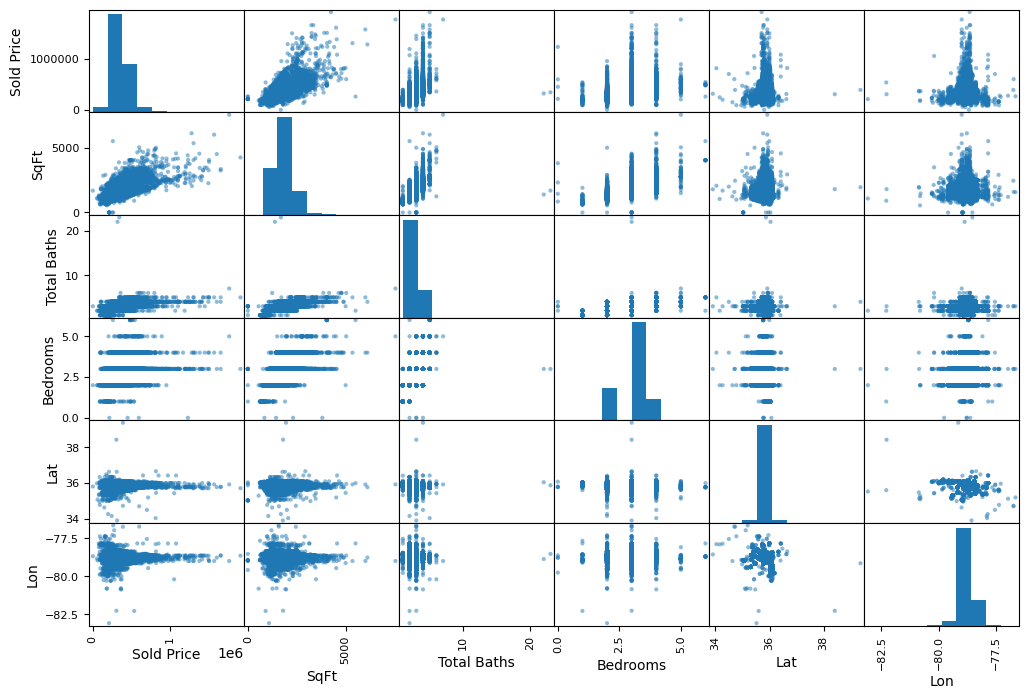

In [9]:
#Visualize the scatter matrix
scatter_columns = ["Sold Price", "SqFt", "Total Baths", "Bedrooms", 'Lat', 'Lon']
scatter_matrix(th_nostr_df[scatter_columns], figsize=(12, 8))
#plt.savefig('matrix.png')

<Axes: xlabel='SqFt', ylabel='Sold Price'>

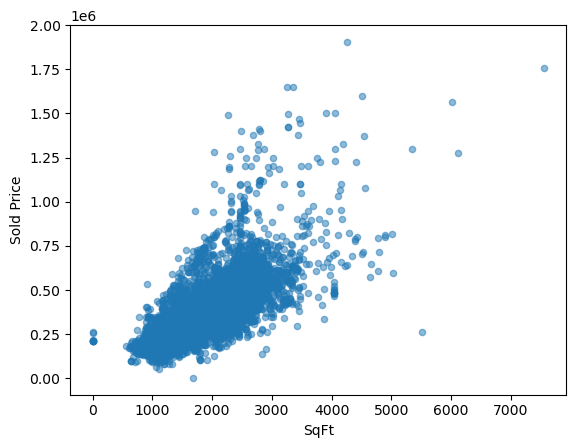

In [10]:
#Visualize the scatter plot for Total Living Area SqFt vs Sold Price
th_nostr_df.plot(kind="scatter", x="SqFt", y="Sold Price", alpha=0.5)
#plt.savefig('scatter.png')

In [11]:
#Create a new column for the price per square foot
th_nostr_df['Price per SqFt'] = th_nostr_df['Sold Price'] / th_nostr_df['SqFt']

#Create a correlation matrix to see what the correlation is for Price per SqFt
corr_matrix = th_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price        1.000000
List Price        0.989238
SqFt              0.726132
Total Baths       0.436058
Bedrooms          0.397968
Days on Market    0.098573
Over Asking       0.037485
Year Built        0.027307
Lat               0.022271
Price per SqFt   -0.019023
Acres            -0.031221
Zip              -0.039405
Lon              -0.092073
Name: Sold Price, dtype: float64

In [12]:
#Check the orginal data frame to see how many cities are in the data
len(th_df['City'].value_counts())

101

/opt/anaconda3/envs/dev/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


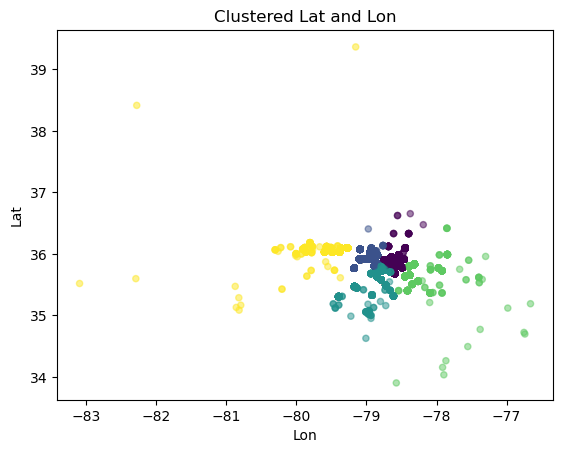

In [13]:
#Cluster the Lat and  Lon into groups
from sklearn.cluster import KMeans
th_df['Cluster'] = KMeans(n_clusters=5).fit_predict(th_df[['Lat', 'Lon']])
th_df.plot(kind="scatter", x="Lon", y="Lat", c="Cluster", cmap='viridis', colorbar=False, alpha=0.5)
plt.title('Clustered Lat and Lon')
plt.savefig('clustered.png')


In [14]:
#Create a variable for the top 10 cities with the highest average sold price
top10 = th_df.groupby('City')['Sold Price'].mean().nlargest(373).reset_index()

#Plot the top 10 cities with the highest average sold price
fig = px.bar(top10, x='City', y='Sold Price',color='City', template='plotly',
             title='Cities with Highest Avg. Sold Price') 
fig.update_traces(textposition='outside')
fig.show()

In [15]:
top10 = th_df.groupby('City')['Total Baths'].mean().nlargest(10).reset_index()

fig = px.bar(top10, x='City', y='Total Baths',color='Total Baths', template='plotly', 
             title='Top 10 Cities with the Most Avg Total Baths')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [16]:
df_mean = th_df.groupby('Over Asking')['SqFt'].mean().reset_index()

fig = px.scatter(df_mean, x='Over Asking', y='SqFt', trendline='ols', 
                 labels={'Over Asking':'Over Asking', 'SqFt':'Mean House Size'})
fig.update_layout(title='Distribution of Mean House Size by Over Asking')
fig.show()

In [17]:
fig = px.scatter(th_df, x='SqFt', y='Over Asking', color='Bedrooms', size='Total Baths',trendline='ols')
fig.update_layout(title='House Size vs Over Asking',
                  xaxis_title='House Size',
                  yaxis_title='Over Asking')
fig.show()

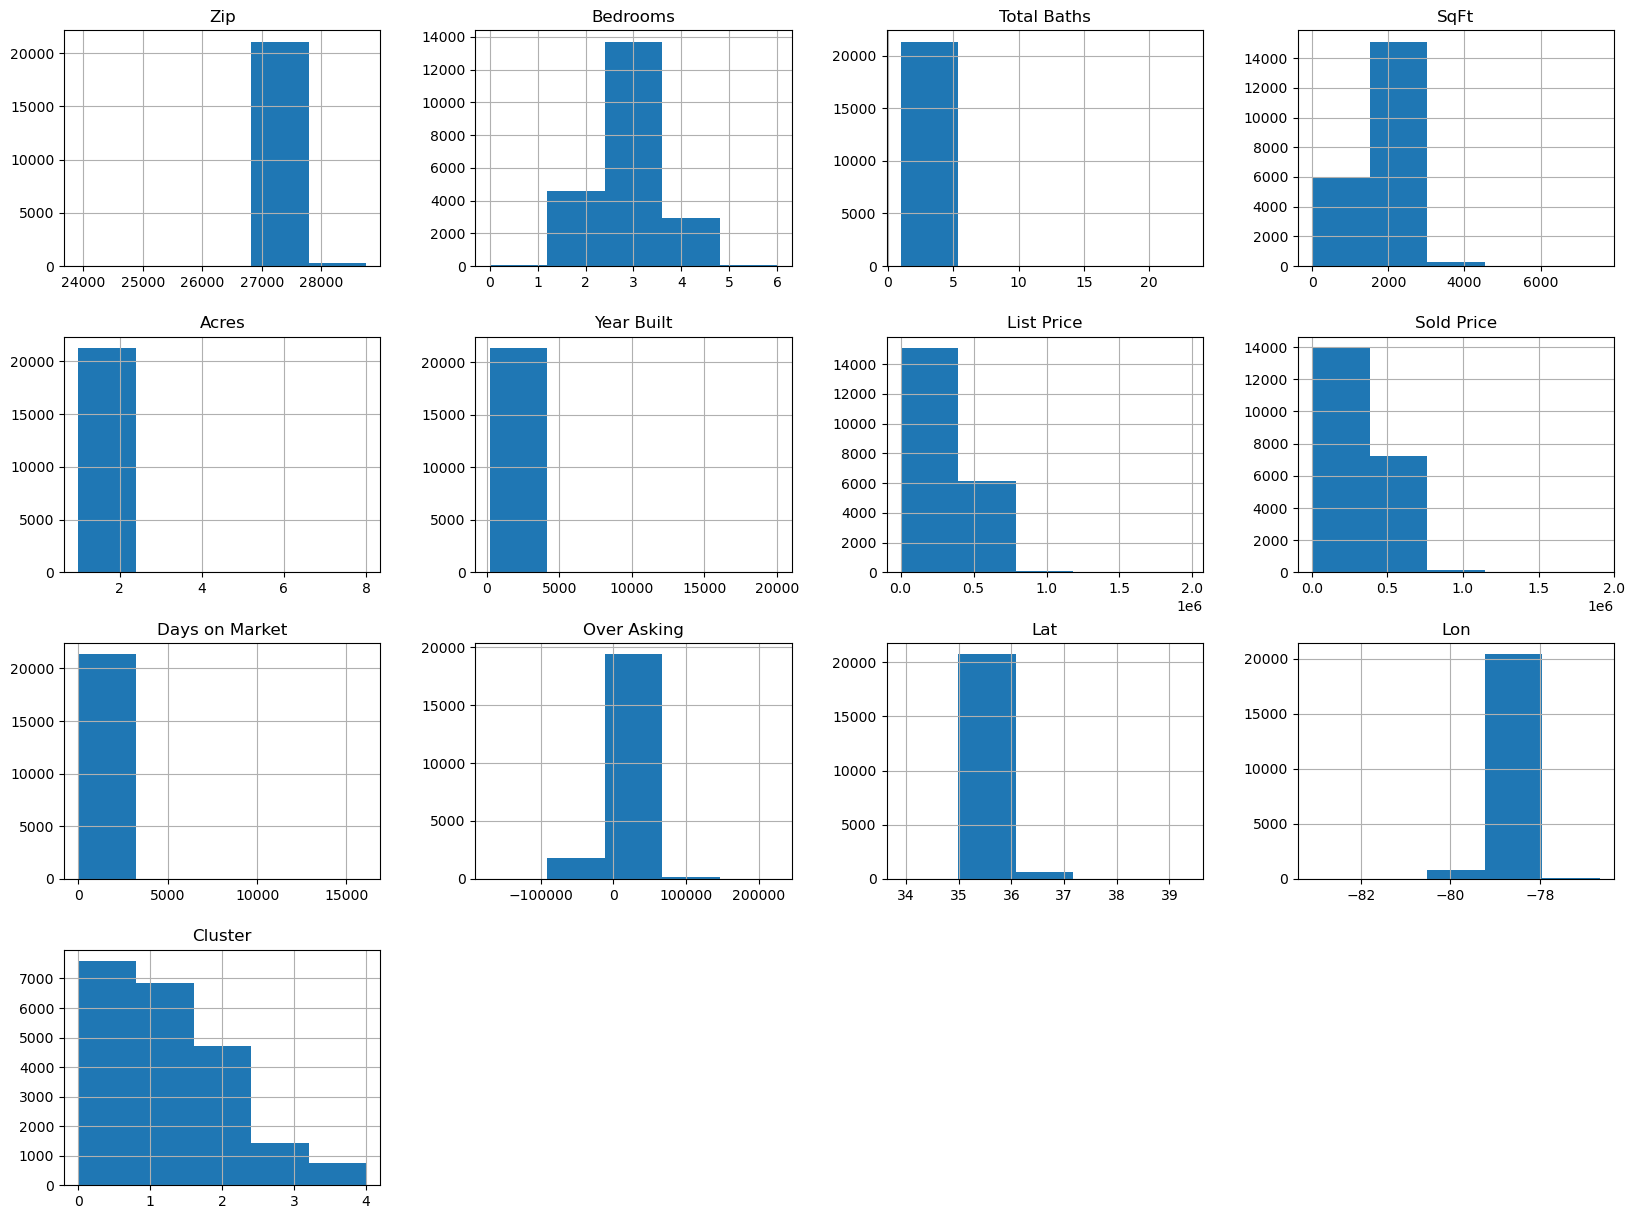

In [18]:
th_df.hist(bins=5, figsize=(20,15))
#plt.savefig("attribute_histogram_plots")
plt.show()

In [19]:
th_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster
139,2509707,Cary,27511,4,4,6115,1,1985,2023-05-08,2023-06-12,1049900,1275000,35,225100,35.7641,-78.7786,2
175,2444544,Chapel Hill,27517,4,5,4049,1,2004,2022-04-25,2022-06-07,1090000,1300000,43,210000,35.9182,-79.0035,1
462,2320632,Durham,27707,3,5,2763,1,2020,2020-05-22,2021-08-05,575000,729840,440,154840,35.9631,-78.9315,1
492,2428221,Cary,27511,3,4,3477,1,2004,2022-01-24,2022-02-09,949900,1100000,16,150100,35.7641,-78.7786,2
547,10018970,Chapel Hill,27517,4,5,4049,1,2004,2024-04-06,2024-04-17,1350000,1500000,11,150000,35.9182,-79.0035,1


In [20]:
# Variable with the Longitude and Latitude
X=th_df.loc[:,['MLS #','Lat','Lon']]
X.head(10)

,MLS #,Lat,Lon
139,2509707,35.7641,-78.7786
175,2444544,35.9182,-79.0035
462,2320632,35.9631,-78.9315
492,2428221,35.7641,-78.7786
547,10018970,35.9182,-79.0035
557,2475238,35.9182,-79.0035
581,2492270,35.7908,-78.6530
627,2456097,35.8520,-78.6841
693,2353812,35.7641,-78.7786
705,2405051,36.0918,-78.9299


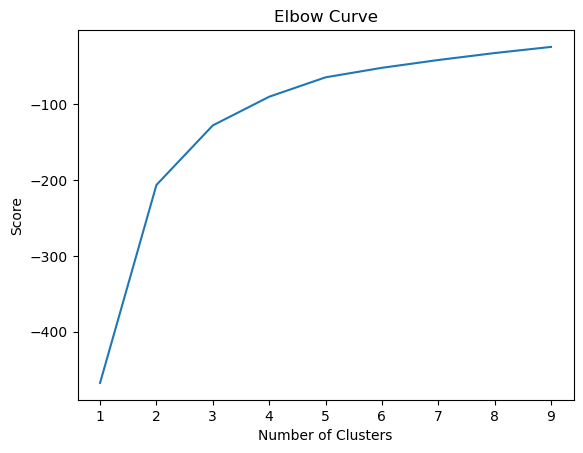

In [21]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = th_df[['Lat']]
X_axis = th_df[['Lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,MLS #,Lat,Lon,cluster_label
139,2509707,35.7641,-78.7786,2
175,2444544,35.9182,-79.0035,1
462,2320632,35.9631,-78.9315,1
492,2428221,35.7641,-78.7786,2
547,10018970,35.9182,-79.0035,1
557,2475238,35.9182,-79.0035,1
581,2492270,35.7908,-78.6530,0
627,2456097,35.8520,-78.6841,0
693,2353812,35.7641,-78.7786,2
705,2405051,36.0918,-78.9299,1


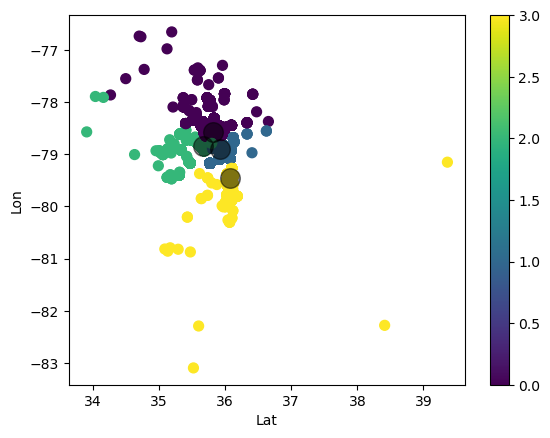

In [23]:
X.plot.scatter(x = 'Lat', y = 'Lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

<Axes: xlabel='SqFt'>

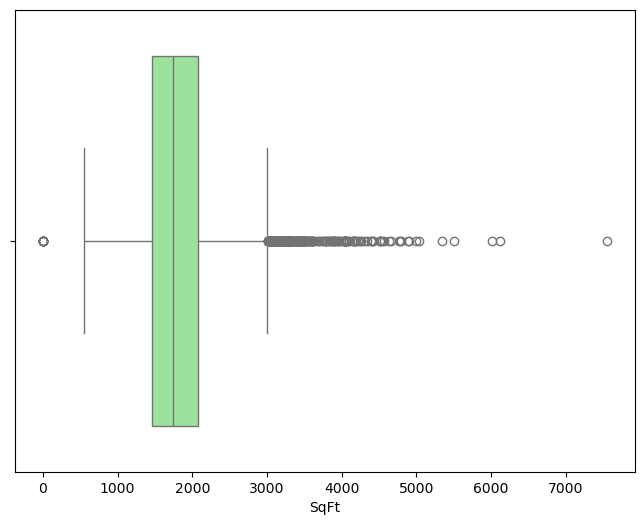

In [24]:
#Visualize the distribution of each numerical feature using box plots. Points beyond the “whiskers” of the box plot can be considered potential outliers.  
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['SqFt'], color='lightgreen')

<Axes: xlabel='Bedrooms'>

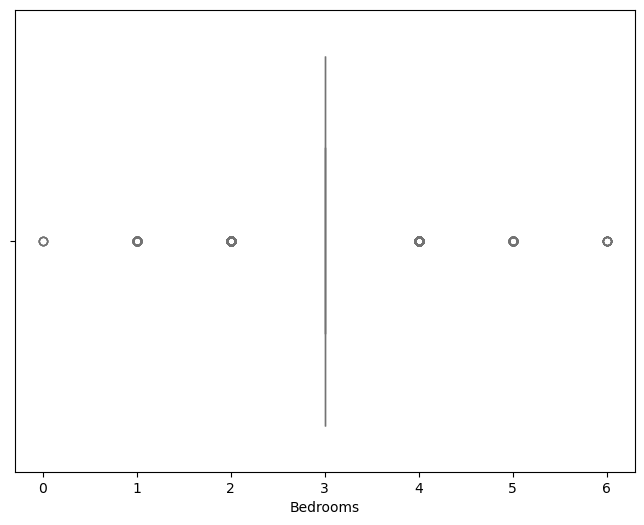

In [25]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Bedrooms'], color='lightgreen')

<Axes: xlabel='Total Baths'>

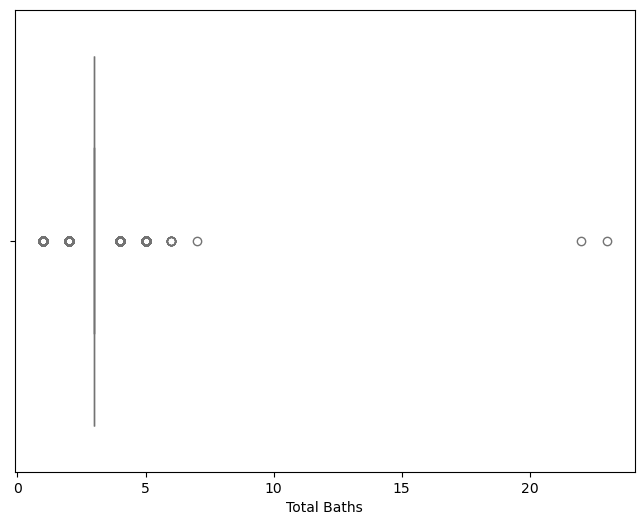

In [26]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Total Baths'], color='lightgreen')

<Axes: xlabel='Acres'>

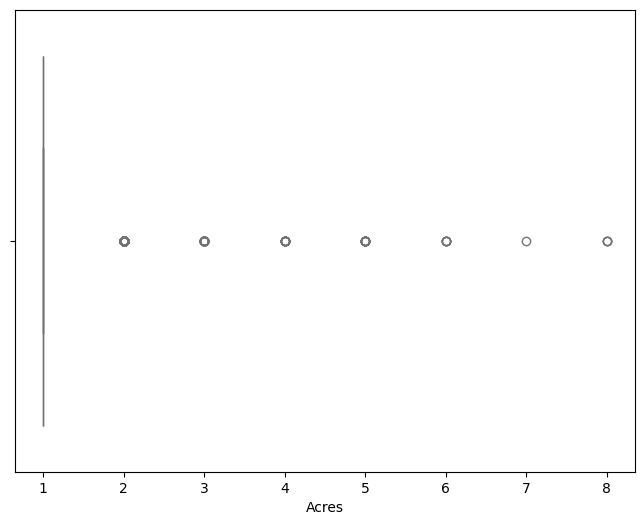

In [27]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Acres'], color='lightgreen')

<Axes: xlabel='Days on Market'>

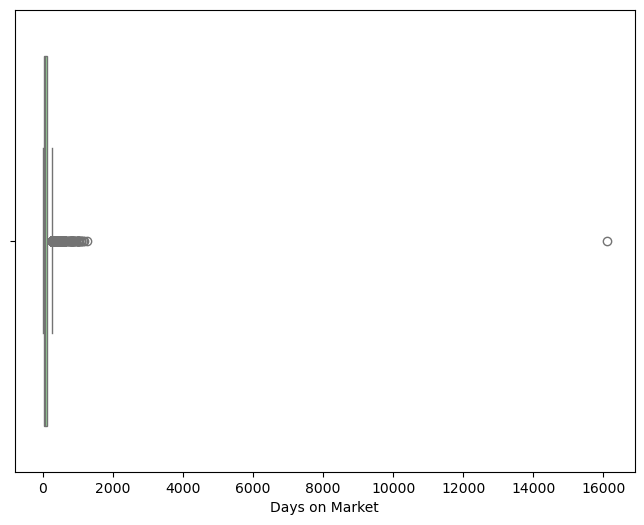

In [28]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Days on Market'], color='lightgreen')

<Axes: xlabel='Year Built'>

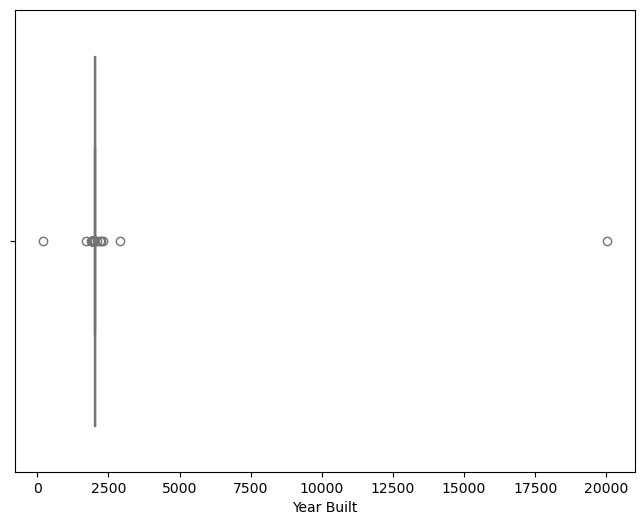

In [29]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Year Built'], color='lightgreen')

In [30]:
#Add the Price per SqFt to this data frame
th_df["Price per SqFt"] = th_df["Sold Price"]/th_df["SqFt"]
th_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
139,2509707,Cary,27511,4,4,6115,1,1985,2023-05-08,2023-06-12,1049900,1275000,35,225100,35.7641,-78.7786,2,208.503679
175,2444544,Chapel Hill,27517,4,5,4049,1,2004,2022-04-25,2022-06-07,1090000,1300000,43,210000,35.9182,-79.0035,1,321.066930
462,2320632,Durham,27707,3,5,2763,1,2020,2020-05-22,2021-08-05,575000,729840,440,154840,35.9631,-78.9315,1,264.147666
492,2428221,Cary,27511,3,4,3477,1,2004,2022-01-24,2022-02-09,949900,1100000,16,150100,35.7641,-78.7786,2,316.364682
547,10018970,Chapel Hill,27517,4,5,4049,1,2004,2024-04-06,2024-04-17,1350000,1500000,11,150000,35.9182,-79.0035,1,370.461842


In [37]:
#Drop all the rows with values higher than 7 for the Total Baths column
th_df = th_df[th_df['Total Baths'] < 6]

In [38]:
#Drop all the rows with values equal to 0 for the Bedrooms column
th_df = th_df[th_df['Bedrooms'] != 0]

In [40]:
#Drop all the rows with values higher than 2025 for the Year Built column
th_df = th_df[th_df['Year Built'] < 2025]

In [43]:
#Drop all the rows with values below 1935 for the Year Built column
th_df = th_df[th_df['Year Built'] > 1935]

In [44]:
#Drop all the rows with values of 0 for the SqFt column
th_df = th_df[th_df['SqFt'] != 0]

In [46]:
#Drop all the rows with a value of 0 for the Zip Code column
th_df = th_df[th_df['Zip'] != 0]

In [47]:
#Drop all the rows with a value of 0 for the Sold Price column
th_df = th_df[th_df['Sold Price'] != 0]

In [48]:
# Save the DataFrame to a CSV file
th_df.to_csv('Clean_Data/mls_th_cleaned.csv', index=False)